# *Optical Tweezers* | Lab-Session #0
## Feb-22-2021 13:45

This jupyter notebook is a used to collect and analyse data during today's lab session

In [2]:
# Import the relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as consts
import os
from csvlib import *
from scipy.optimize import curve_fit

# Display mpl in notebook format
%matplotlib inline

# Data Collection

In [3]:
# open CSV files to numpy array
csvs = list_csv(PRINT='True')   # Lists CSV files in a given directory
indx = 1
DATA = pd.read_csv(csvs[indx])     # Gets the CSV file as a Pandas Data Frame
data = DATA.to_numpy().T        # Gets data as a numpy array
DATA                            # Prints pretty PANDAS data frame

x = data[0]
y = data[1]
z = data[2]

stg_x = data[3]
stg_y = data[4]

t = np.linspace(0,5,len(x))

List of .csv files in .
	 0 : FEB-22-2021-DRAG (root).csv
	 1 : TRP_Drag_100_10_1.csv
	 2 : TRP_Drag_100_10_2.csv
	 3 : TRP_Drag_150_10_1.csv
	 4 : TRP_Drag_150_10_2.csv
	 5 : TRP_Drag_200_10_1.csv
	 6 : TRP_Drag_200_10_2 #1.csv
	 7 : TRP_Drag_200_10_2.csv
	 8 : TRP_Drag_250_10_1.csv
	 9 : TRP_Drag_250_10_2.csv
	 10 : TRP_Drag_50_10_1.csv
	 11 : TRP_Drag_50_10_2 #1.csv
	 12 : TRP_Drag_50_10_2.csv
	 13 : TRP_Drag_Y_100_10_1.csv
	 14 : TRP_Drag_Y_100_10_2.csv
	 15 : TRP_Drag_Y_150_10_1.csv
	 16 : TRP_Drag_Y_150_10_2.csv
	 17 : TRP_Drag_Y_200_10_1.csv
	 18 : TRP_Drag_Y_200_10_2.csv
	 19 : TRP_Drag_Y_250_10_1 #1.csv
	 20 : TRP_Drag_Y_250_10_1.csv
	 21 : TRP_Drag_Y_250_10_2.csv
	 22 : TRP_Drag_Y_50_10_1.csv
	 23 : TRP_Drag_Y_50_10_2.csv
	 24 : data.csv


# Data Analysis

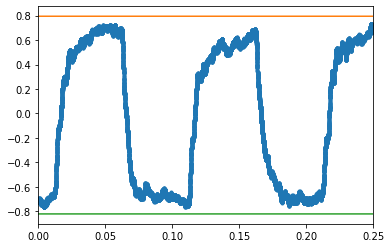

In [5]:
plt.plot(t,x,'.')

plt.xlim(0,0.25)

max_x = max(x)
min_x = min(x)

max_plot = np.repeat(max_x,len(x))
min_plot = np.repeat(min_x,len(x))

plt.plot(t,max_plot,t,min_plot)

In [ ]:
# Data fitting
# let's get some data x,y
Npts = 1000
x = np.linspace(0,10,Npts)
y = 3*np.sin(2*x) + 4 + np.random.normal(0,1,Npts)

# Example of trying to fit a function with 3 parameters 
def fit(x,a,b,c):
    return a*np.sin(b*x) + c

params, _ = curve_fit(fit,x,y,bounds=(0,(4,4,6)))

# Define the figure and plot parameters
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title('A PLOT',fontsize=17)
ax.set_xlabel('x-axis [Au]',fontsize=15)
ax.set_ylabel('y-axis [Au]',fontsize=15)

# Plot the actual elements
ax.scatter(x,y,color = 'C2',s = 7, marker = 'o',label='Experimental Data')
ax.plot(x,fit(x,*params), color = 'black', lw = 2, label='Fit: a=%5.3f, b=%5.3f c=%5.3f'%tuple(params))

ax.legend(fontsize = 10)
ax.grid()